# Classification using Decision Tree

- Understand when to use a Decision Tree Model for classification Problems.
- Learn what splitting criteria decision tree use to create rules.
- Learn how to draw a decision tree.
- Lear how to find optimal hyperparameters for decision tree.

## Overview

- Decision Trees are collection of divide–conquer problem-solving strategies that use tree-like structure to predict the outcome of a variable. 

- Decision tree builds **if..else..** kind of rules to split data into multiple subsets. 

- The original data starts at root node and is divided into subsets to create more homogenous groups at the children nodes.

- It is one of the most powerful predictive analytics techniques used for generating business rules.

- Decision tree are very popular because of its interpretability. The models can be visualized and understood.

- Decision tree can be used for both classification and regression models.

### German Credit Rating Classification

We have already used this dataset in our previous example logistic regression. 

https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

| Variable | Variable Type| Description | Categories | 
| :----------| :-------------- |:--------------| :--------------|
|checkin_acc| categorical | Status of existing checking account | <ul><li> A11 : ... < 0 DM </li><li> A12 : 0 <= ... < 200 DM </li><li> A13 : ... >= 200 DM / salary assignments for at least 1 year </li><li> A14 : no checking account </li></ul>|
|duration| numerical | Status of existing checking account | |
|credit_history| categorical | Credit History | <ul><li>A30 : no credits taken/ all credits paid back duly </li><li>A31 : all credits at this bank paid back duly </li><li>A32 : existing credits paid back duly till now </li><li>A33 : delay in paying off in the past </li><li>A34 : critical account/ other credits existing (not at this bank) </li></ul>|
|amount| numerical | Status of existing checking account | |
|savings_acc| Categorical | Status of existing checking account | <ul><li>A61 : ... < 100 DM </li><li>A62 : 100 <= ... < 500 DM </li><li>A63 : 500 <= ... < 1000 DM </li><li>A64 : .. >= 1000 DM </li><li>A65 : unknown/ no savings account </li></ul>|
|present_emp_since| Categorical | Status of existing checking account | <ul><li>A71 : unemployed </li><li>A72 : ... < 1 year </li><li>A73 : 1 <= ... < 4 years </li><li>A74 : 4 <= ... < 7 years </li><li>A75 : .. >= 7 years </li></ul>|
|inst_rate| numerical | Installment rate  | |
|personal_status| Categorical | Personal status and sex | <ul><li>A91 : male : divorced/separated </li><li>A92 : female : divorced/separated/married </li><li>A93 : male : single </li><li>A94 : male : married/widowed </li><li>A95 : female : single </li></ul>|
|residing_since| numerical | residing since in years | |
|age| numerical | age in years | |
|inst_plans| categorical | Status of existing checking account | <ul><li>A141 : bank </li><li>A142 : stores </li><li>A143 : none </li></ul> |
|num_credits| Categorical | Status of existing checking account | <ul><li> A11 : ... < 0 DM </li><li> A12 : 0 <= ... < 200 DM </li><li> A13 : ... >= 200 DM / salary assignments for at least 1 year </li><li> A14 : no checking account </li></ul>|
|job| categorical | job | <ul><li>A171 : unemployed/ unskilled - non-resident </li><li>A172 : unskilled - resident </li><li>A173 : skilled employee / official </li> <li>A174 : management/ self-employed/highly qualified employee/ officer </li> </ul> |
|status| categorical | Credit status | <ul><li> 0: Good Credit </li><li> 1: Bad Credit </li></ul>|

### Loading Dataset 

Then dataset contains records with comma separated values and can be read using pandas' *read_csv()* method.

In [1]:
import pandas as pd
import numpy as np

credit_df = pd.read_csv( "German Credit Data.csv" )
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


There are 700 observations of good credit and 300 observations of bad credit.

For building a classification mode, *status* column will be used as dependent variable, while the remaining columns will be independent variables. We will define a list *X_features* containing all independent variable column names. This variable can be used to select the subset of columns or features we will use to split dataset and then build and validate the model.

In [2]:
X_features = list( credit_df.columns )
X_features.remove( 'status' )
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

### Encoding Categorical Features

There are several categorical variables, which need to be binary encoded. Pandas method *pd.get_dummies()* is used to encode the categorical features and create dummy variables. If the feature has *n* categories then *(n-1)* dummy variables can be created. If *(n-1)* categories are created, then the omitted category serves as base category. *drop_first* parameter in *pd.get_dummies()* need to be set to *True* to drop the first category.

In [3]:
encoded_credit_df = pd.get_dummies( credit_df[X_features], 
                                   drop_first = True )

The original categorical features have been replaced in *encoded_credit_df* with appropriate dummy features. We can list the new dummy features that have been created.

In [4]:
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [5]:
import statsmodels.api as sm

Y = credit_df.status
X = sm.add_constant( encoded_credit_df )

### Split the dataset

In [6]:
Y = credit_df.status
X = encoded_credit_df

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split( X, Y, 
                                                    test_size = 0.3,
                                                    random_state = 42)

### Building Decision Tree classifier using Gini Criteria

*sklearn.tree.DecisionTreeClassifier* provides this algorithm to create the decision tree and take the following key parameters

- criterion : string - The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Default is *gini*.
- max_depth : int - The maximum depth of the tree. 

Detailed documentation is available at http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Let's build the model on the credit rating dataset. We have already read the dataset using *credit_df* variable. We will set *criterion* to *gini*, *max_depth* to 3 and keep default values for other parameters.

In [7]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion = 'gini', 
                                  max_depth = 3 )

In [8]:
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=3)

### Measuring Test Accuracy

In [9]:
from sklearn import metrics
tree_predict = clf_tree.predict( X_test )
metrics.roc_auc_score( y_test, tree_predict )

0.5835743204164258

### Displaying the Tree

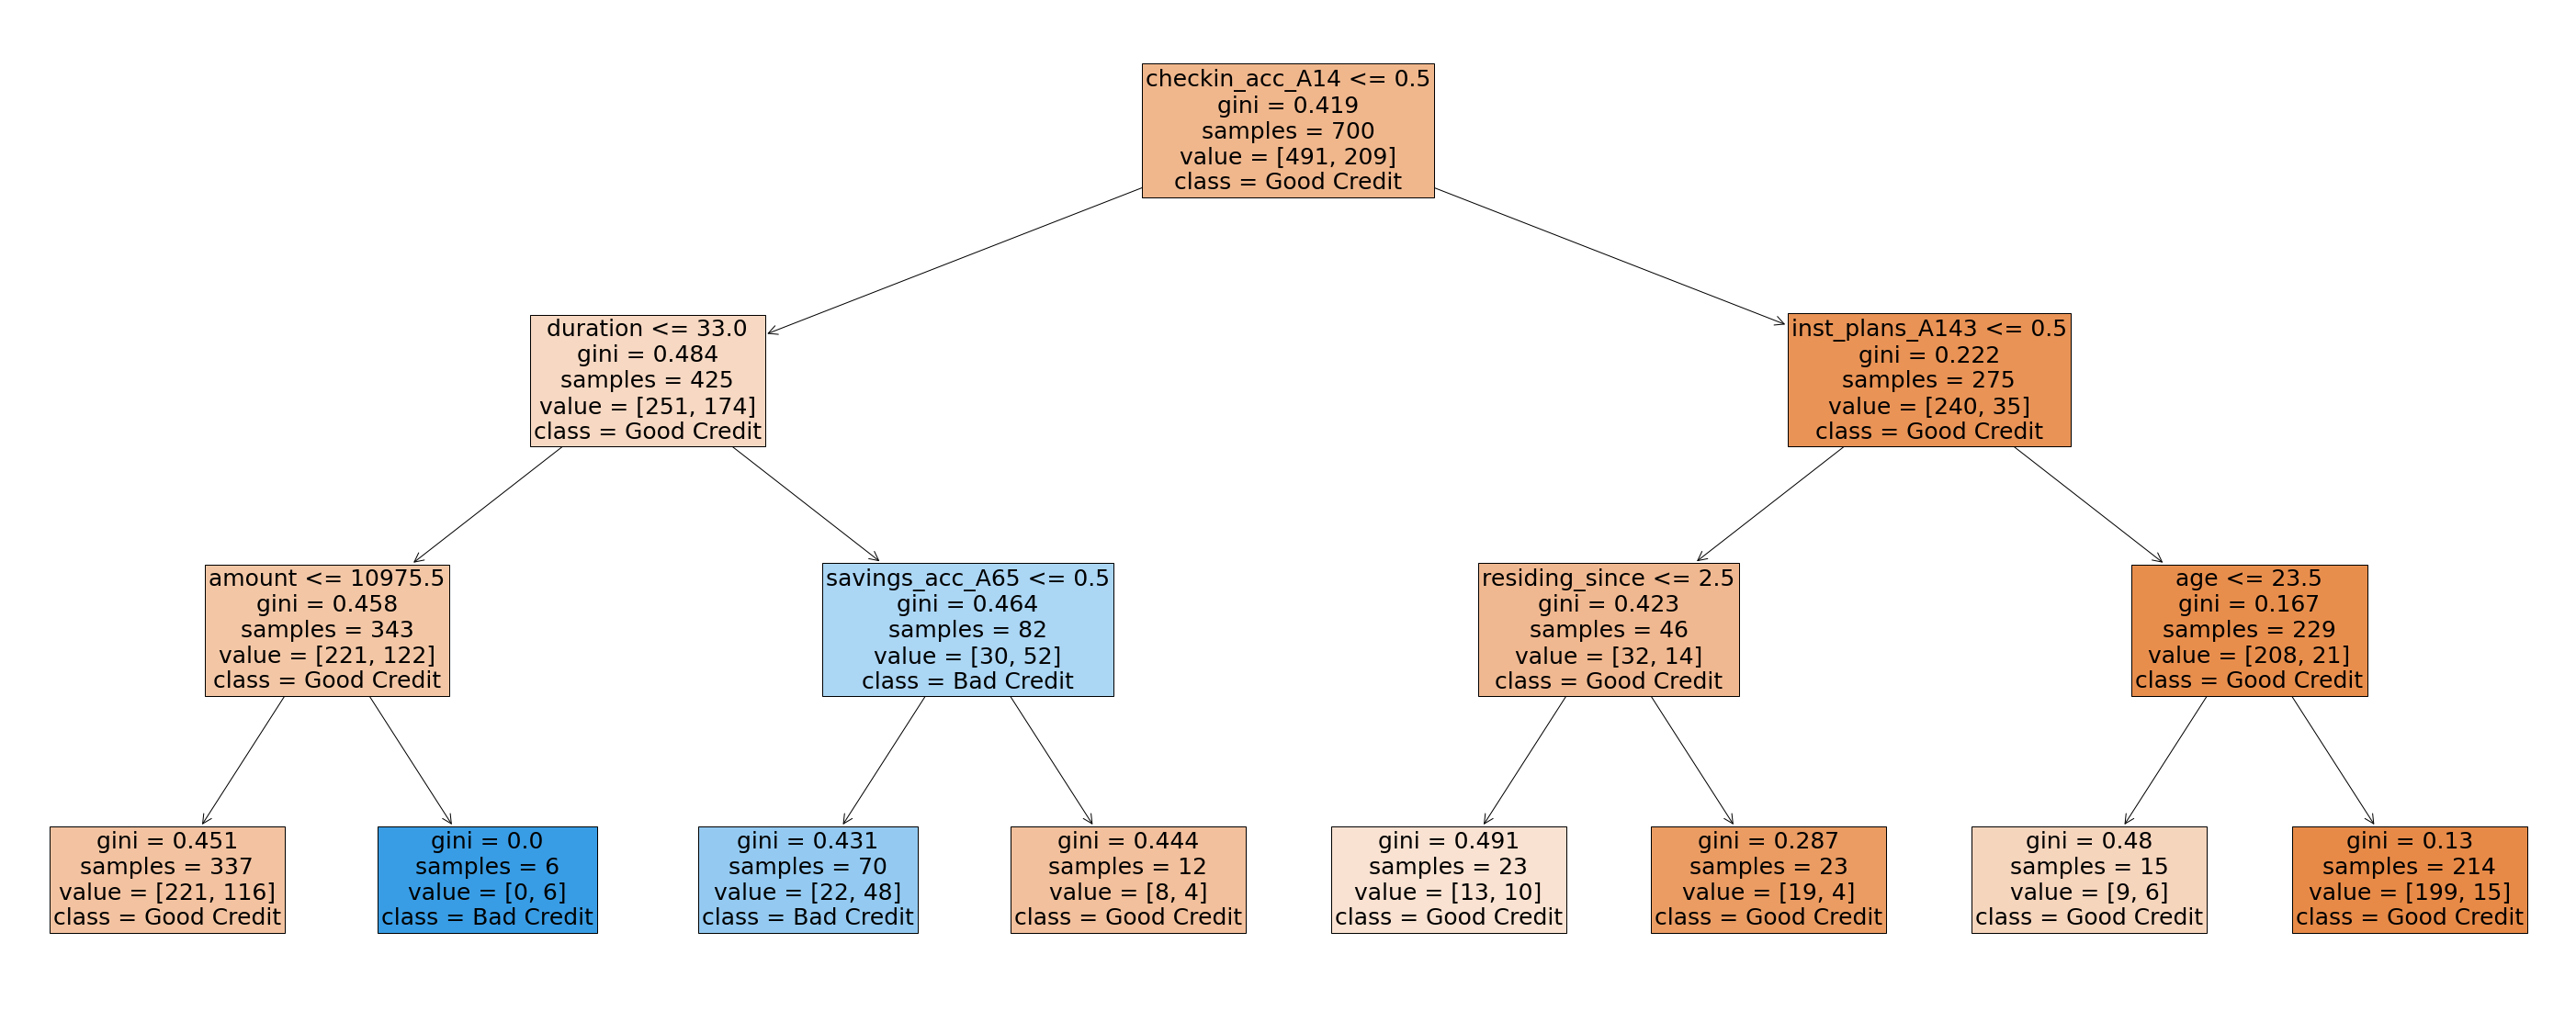

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (50, 20))
plot_tree(clf_tree,
          feature_names = X_train.columns,
          class_names = ['Good Credit', 'Bad Credit'],
          filled = True,
          fontsize = 25);

#### Understanding Gini Impurity

Gini measurement is the probability of a random sample being classified correctly if we randomly pick a label according to the distribution in a branch.

Gini impurity can be computed by summing the probability 
$p_{i}$ of an item with label $i$ being chosen times the probability $1-p_{i}$ of a mistake in categorizing that item. It reaches its minimum (zero) when all cases in the node fall into a single target category.

$${Gini \space Index=\sum _{i=1}^{J}p_{i}(1-p_{i})=\sum _{i=1}^{J}(p_{i}-{p_{i}}^{2})=\sum _{i=1}^{J}p_{i}-\sum _{i=1}^{J}{p_{i}}^{2}=1-\sum _{i=1}^{J}{p_{i}}^{2}}$$

So, in the top node the probability of finding default is 491/700 and not finding default is 209/700. Gini impurity for the top node in the above decision tree wil be:

In [11]:
gini_node_1 = 1 - pow(491/700, 2) - pow (209/700, 2)
print( round( gini_node_1, 4) )

0.4189


In [12]:
X_test.shape

(300, 29)

As we move down the tree nodes, we can observe the gini impurity decreases there by creating more and more homogeneous nodes.

### Building Decision Tree using Entropy Criteria

Entropy is another popular measure of impurity that is used in classification trees to split a node. Assume that there are K classes labelled $C_{1}, C_{2}, …, C_{K}$. The entropy at node t is given by

$entropy = - \sum_{i=1}^{K}p(C_{i})log_{2} p(C_{i})$

The value of entropy lies between 0 and 1, with a higher entropy indicating a higher impurity at the node.

Let's build a decision tree with *entropy* splitting criteria. 

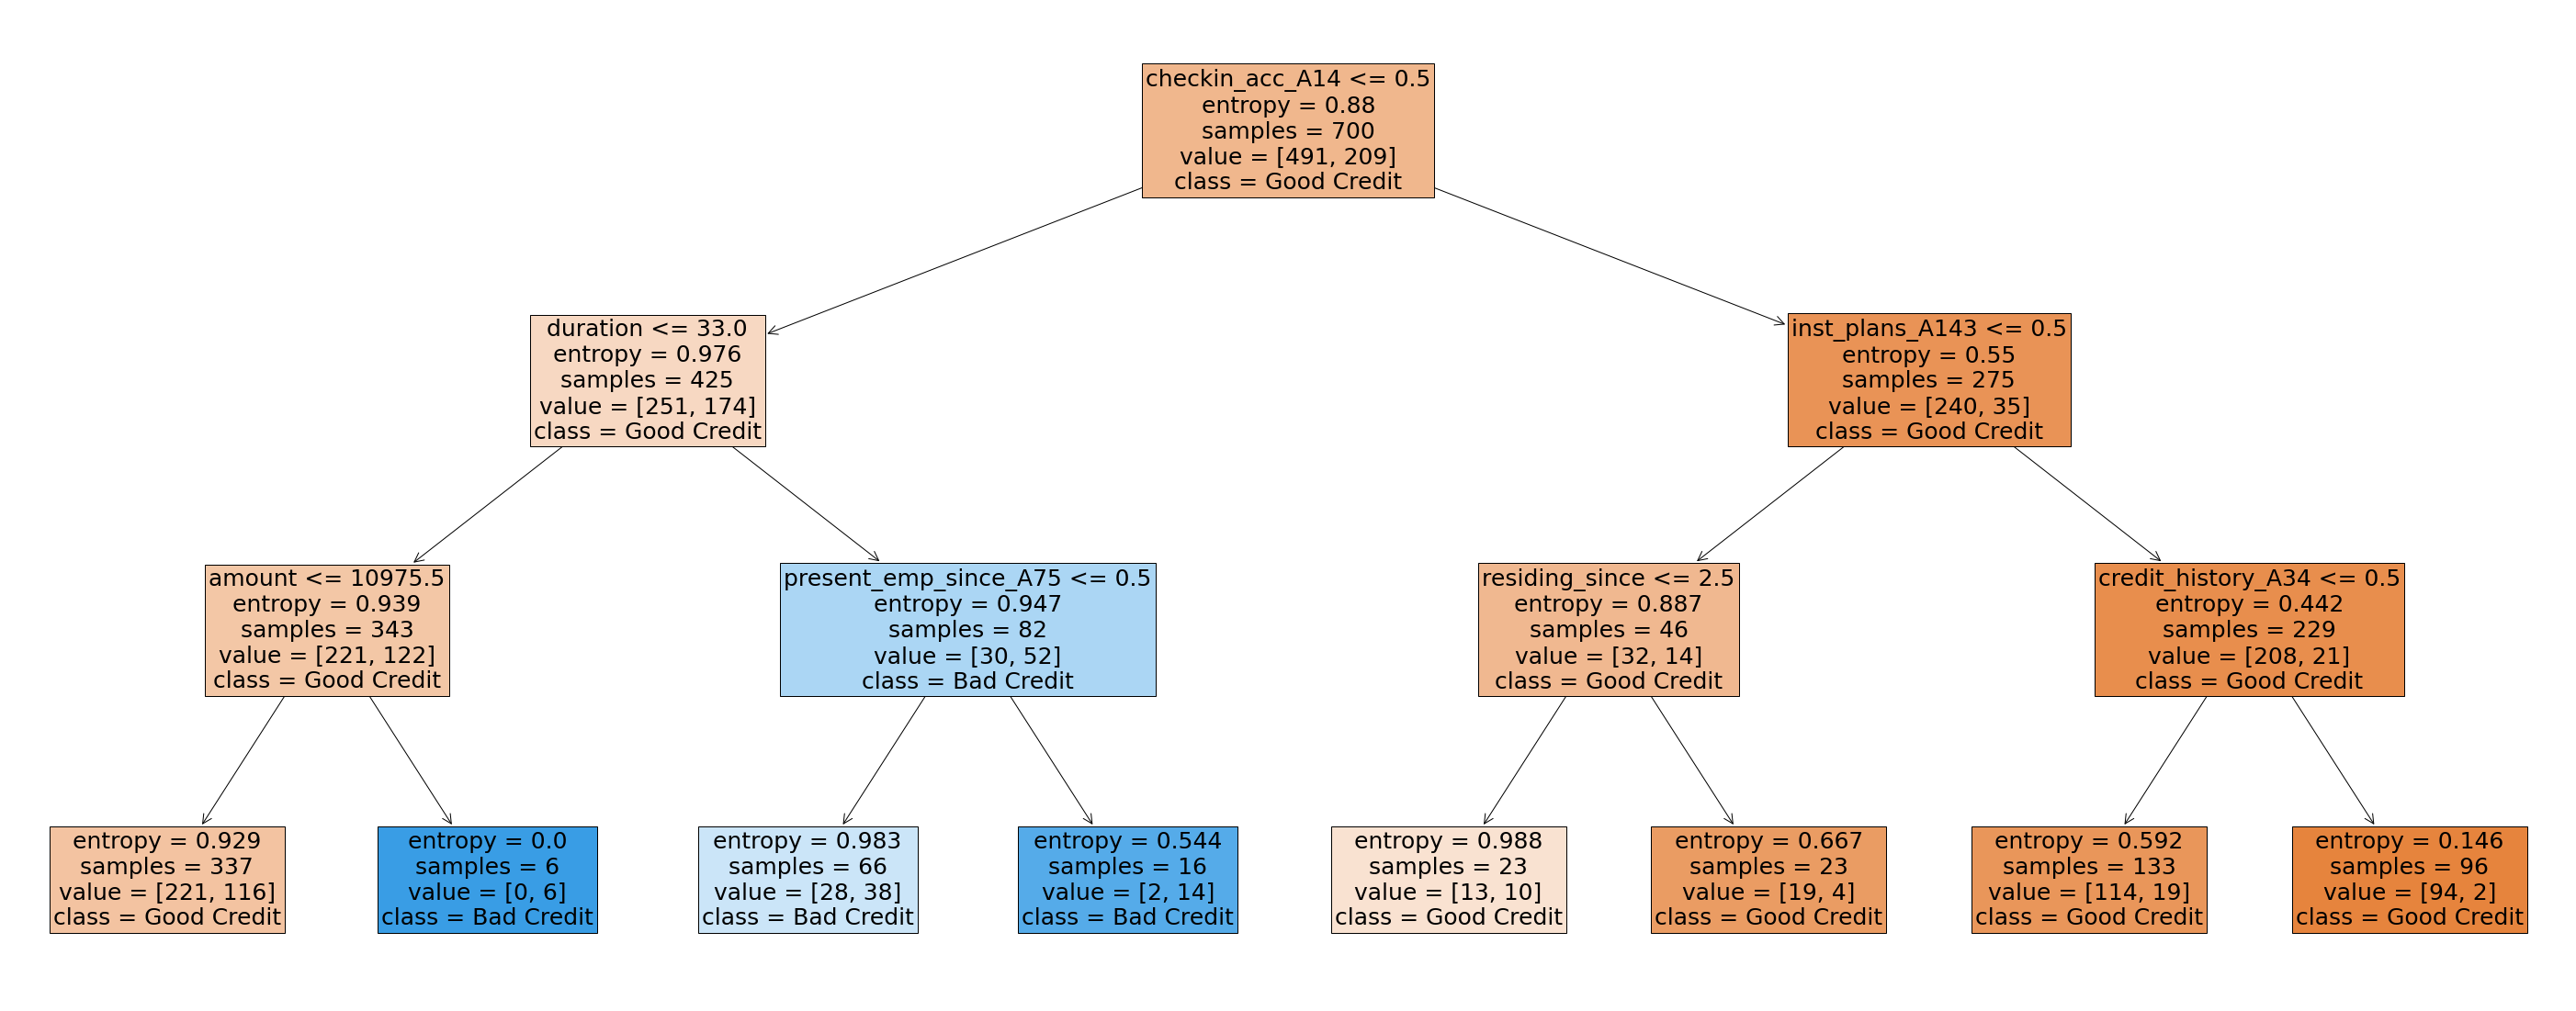

In [13]:
clf_tree_entropy = DecisionTreeClassifier( criterion = 'entropy', 
                                          max_depth = 3 )
clf_tree_entropy.fit( X_train, y_train )

plt.figure(figsize = (50, 20))
plot_tree(clf_tree_entropy,
          feature_names = X_train.columns,
          class_names = ['Good Credit', 'Bad Credit'],
          filled = True,
          fontsize = 25);

#### Calculating entropy impurity

From the above tree, the probability of finding default is 491 and not finding default is 209. So, entropy at the node is

In [14]:
import math

entropy_node_1 = - (491/700) * math.log2(491/700) - (209/700) * math.log2(209/700)
print( round( entropy_node_1, 2) )

0.88


#### Measuring test accuracy

In [15]:
tree_predict = clf_tree_entropy.predict( X_test )
metrics.roc_auc_score( y_test, tree_predict )

0.5763972869236027

### Finding optimal criteria and max_depth

*GridSearchCV* can be used for any machine learning model and can search through multiple hyperparameters of the model. It takes the following arguments,

- estimator - scikit-learn model, which implements estimator interface. 

- param_grid - A dictionary with parameters names (string) as keys and lists of parameter settings to try as values.

- scoring - string - the accuracy measure e.g. 'r2'.

- cv - integer - the number of folds in KFold,

In [16]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini','entropy'], 
                     'max_depth': range(2,10)}]


clf_tree = DecisionTreeClassifier()

clf = GridSearchCV(clf_tree,
                 tuned_parameters,
                 cv=10,
                 scoring='roc_auc')

clf.fit(X_train, y_train )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

Grid search returns *best_score_* and corresponding *best_params_* after searching through all combinations.

In [17]:
clf.best_score_

0.6833090864917397

In [18]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4}

The tree with *gini* criteria and *max_depth* 2 is the best model. Finally, we can build a model with these parameters and meaure test accuracy. This is left to the readers for trying out.

## Lessons Learnt:

1. Decision trees can be used for classification and regression problems.
2. Rules generated by decision trees are simple and interpretable. 
3. Trees can be visualised and understood. And hence rules can help create business strategies.
4. The hyperparameters can be tuned using grid search mechanism to find an optimal model.